<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day01(SyntheticData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Overview:
A configurable Python module for generating synthetic tabular datasets with known statistical properties. This is the foundation for testing ML pipelines, understanding distributions, and debugging preprocessing code.
Why This Matters:
Most ML practitioners treat data as a given—something that arrives and must be dealt with. By learning to generate data with specific properties, you develop intuition that's hard to get any other way:

> You understand what different probability distributions actually look like
> You learn how correlation structures affect downstream analysis
> You can verify your models by checking if they recover known relationships
> You can create edge cases to stress-test your pipelines

Features:

Distribution Support:-
Gaussian: Symmetric, bell-curved data (heights, test scores)
Uniform: Equal probability across a range (random IDs, initialization)
Exponential: Time between events (wait times, equipment failure)
Log-normal: Positive, right-skewed (income, file sizes)
Poisson: Count of rare events (website visits, defects)
Binomial: Successes in fixed trials (conversion rates)
Categorical: Discrete categories with specified probabilities

Correlation Injection:-
Using Cholesky decomposition to inject specific correlation structures between features while preserving marginal distributions.
Missing Value Mechanisms

MCAR: Missing Completely At Random:-
MAR: Missing At Random (depends on other observed features)
MNAR: Missing Not At Random (depends on the value itself)

Target Variable Generation:-
Binary classification with logistic relationship
Multiclass with configurable number of classes
Continuous for regression tasks

Outlier Injection:-
Configurable contamination with extreme values.

"""

In [17]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple, Optional, Union
import warnings
import matplotlib.pyplot as plt

In [2]:
import os

# Define your project structure
base_path = '/content/100-days-of-ml'

folders = [
    f'{base_path}/phase-1-data-foundations',
    f'{base_path}/phase-2-classical-ml',
    f'{base_path}/phase-3-deep-learning',
    f'{base_path}/phase-4-computer-vision',
    f'{base_path}/phase-5-nlp',
    f'{base_path}/phase-6-advanced',
]

# Create all folders
for folder in folders:
    os.makedirs(folder, exist_ok=True)

print('✓ Project structure created!')
!ls {base_path}

✓ Project structure created!
phase-1-data-foundations  phase-3-deep-learning    phase-5-nlp
phase-2-classical-ml	  phase-4-computer-vision  phase-6-advanced


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Now create folders in Drive (these persist forever)
os.makedirs('/content/drive/MyDrive/100-days-of-ml/day-01', exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os

# Create the folder path
folder_path = '/content/drive/MyDrive/100-days-of-ml/phase-1-data-foundations/day-01-synthetic-data-generator'
os.makedirs(folder_path, exist_ok=True)

print(f'✓ Created: {folder_path}')

✓ Created: /content/drive/MyDrive/100-days-of-ml/phase-1-data-foundations/day-01-synthetic-data-generator


A simple generator

In [8]:
rng = np.random.default_rng(42)

data = rng.normal(loc=0, scale=1, size = 1000)

print(f"Mean: {data.mean():.3f}")
print(f"Std Dev: {data.std():.3f}")

"""
loc=0 → the center (mean) of the distribution
scale=1 → the spread (standard deviation)
size=1000 → how many numbers to generate
"""

Mean: -0.029
Std Dev: 0.989


Multiple features with Different distributions

In [ ]:
"""
Core RNG Control

default_rng() – Creates a new random number generator with the recommended, high-quality default algorithm (PCG64).

Generator – Object that produces random numbers using a specific bit generator.

Uniform & Basic Distributions:

random() – Samples floats uniformly from [0.0, 1.0).

integers() – Generates random integers from a specified range.

uniform() – Draws samples from a continuous uniform distribution over [low, high).

choice() – Randomly selects elements from a given array, with or without replacement.

Normal & Related Distributions:

normal() – Samples from a Gaussian (normal) distribution.

standard_normal() – Samples from a standard normal distribution (mean 0, std 1).

lognormal() – Draws samples from a log-normal distribution.

multivariate_normal() – Generates vectors from a multivariate normal distribution.

Discrete Probability Distributions:

binomial() – Samples from a binomial distribution.

poisson() – Generates samples from a Poisson distribution.

negative_binomial() – Draws samples from a negative binomial distribution.

geometric() – Returns the number of trials until first success.

hypergeometric() – Samples without replacement from a finite population.
"""

In [11]:
rng = np.random.default_rng(42)
n_samples = 1000

data = pd.DataFrame({
    'age': rng.normal(loc=35, scale=10, size=n_samples),
    'income': rng.lognormal(mean=10.5, sigma=0.5, size=n_samples),
    'tenure': rng.exponential(scale=3, size=n_samples),
    'purchases': rng.poisson(lam=5, size=n_samples),
    'region': rng.choice(['North', 'South', 'East', 'West'],
                         size=n_samples,
                         p=[0.3, 0.25, 0.25, 0.2])
})

print(data.head())
print(f"\n Shape: {data.shape}")

         age        income    tenure  purchases region
0  38.047171  35254.860208  0.093114         10  South
1  24.600159  25219.090137  0.933518          1   West
2  42.504512  29518.234413  1.716552          4   West
3  44.405647  49859.044282  1.331209          8  South
4  15.489648  36369.894804  1.586034          5   West

 Shape: (1000, 5)


Visualizing to understand the nature of data

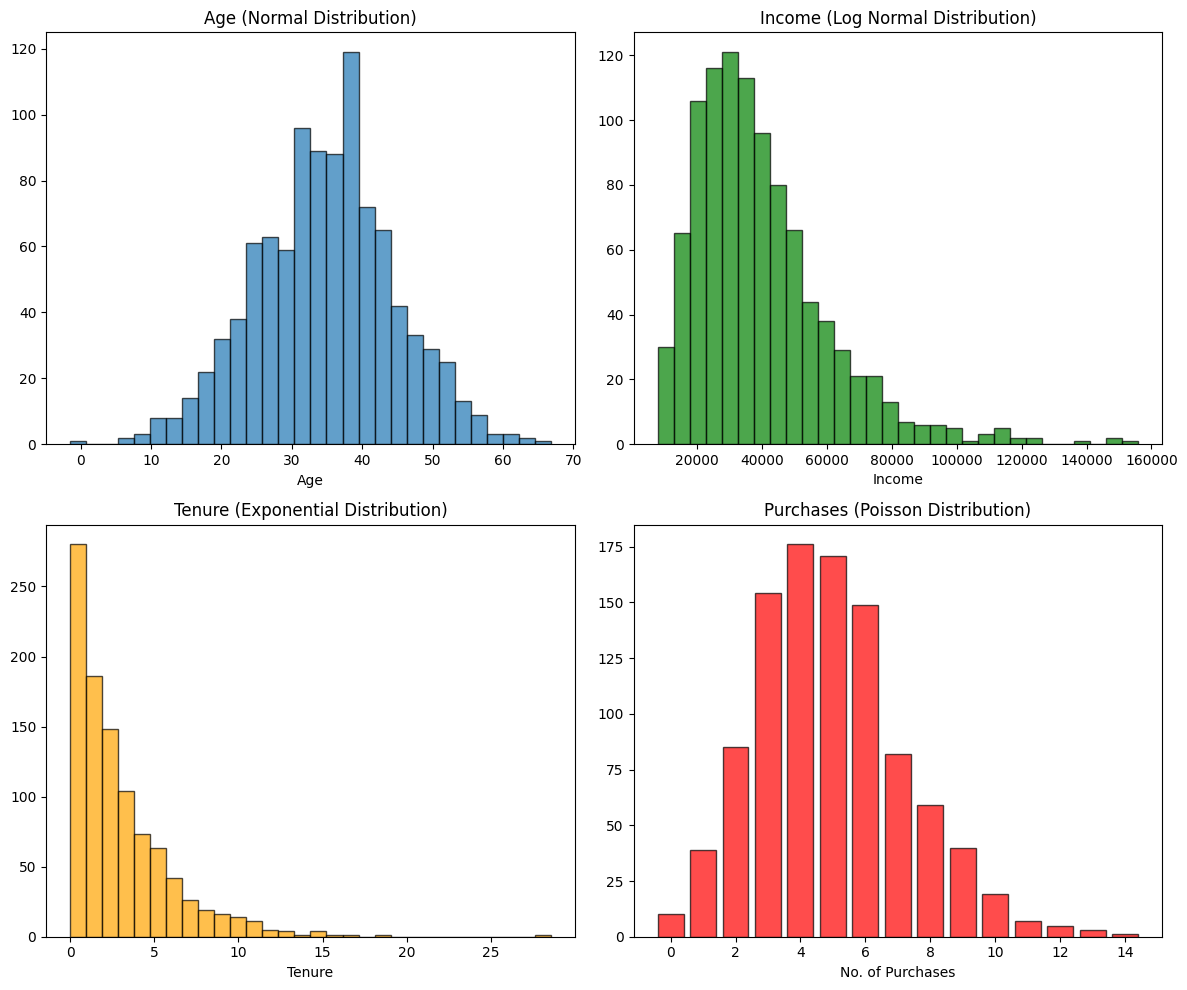

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age - normal distribution
axes[0, 0].hist(data['age'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title("Age (Normal Distribution)")
axes[0, 0].set_xlabel("Age")

# Income - Log normal distribution
axes[0, 1].hist(data['income'], bins=30, edgecolor='black', alpha=0.7, color='g')
axes[0, 1].set_title("Income (Log Normal Distribution)")
axes[0, 1].set_xlabel("Income")

# Tenure - Exponential distribution
axes[1, 0].hist(data['tenure'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1,0].set_title("Tenure (Exponential Distribution)")
axes[1, 0].set_xlabel("Tenure")

# Purchases - Poisson Distribution
unique, counts = np.unique(data['purchases'], return_counts=True)
axes[1, 1].bar(unique, counts, edgecolor='black', alpha=0.7, color="r")
axes[1, 1].set_title("Purchases (Poisson Distribution)")
axes[1, 1].set_xlabel("No. of Purchases")

plt.tight_layout()
plt.show()

In [ ]:
"""
Each distribution models different real-world phenomena:

Normal: Things influenced by many small random factors (height, test scores)
Log-normal: Positive values that multiply (income, stock prices)
Exponential: Time until an event (customer churn, equipment failure)
Poisson: Counts of rare events (website visits, defects)

"""

Adding Correlations using Cholesky decomposition

In [19]:
from scipy import stats
from scipy.linalg import cholesky

def generate_correlated_features(n_samples, correlation, seed=42):
  #define the correlation matrix
  corr_matrix = np.array([
      [1.0, correlation],
      [correlation, 1.0]
  ])

  #define cholesky decomposition
  #This finds matrix L where L @ L.T = corr_matrix

  L = cholesky(corr_matrix, lower=True)
  independent = rng.standard_normal((n_samples, 2))
  correlated = independent @ L.T

  return correlated[:, 0], correlated[:, 1]

# Generate with correlation
x, y = generate_correlated_features(1000, correlation=0.7)

print(f"requested Correlations: 0.7")
print(f"Actual Correlations: {np.corrcoef(x, y)[0, 1]:.3f}")

requested Correlations: 0.7
Actual Correlations: 0.733


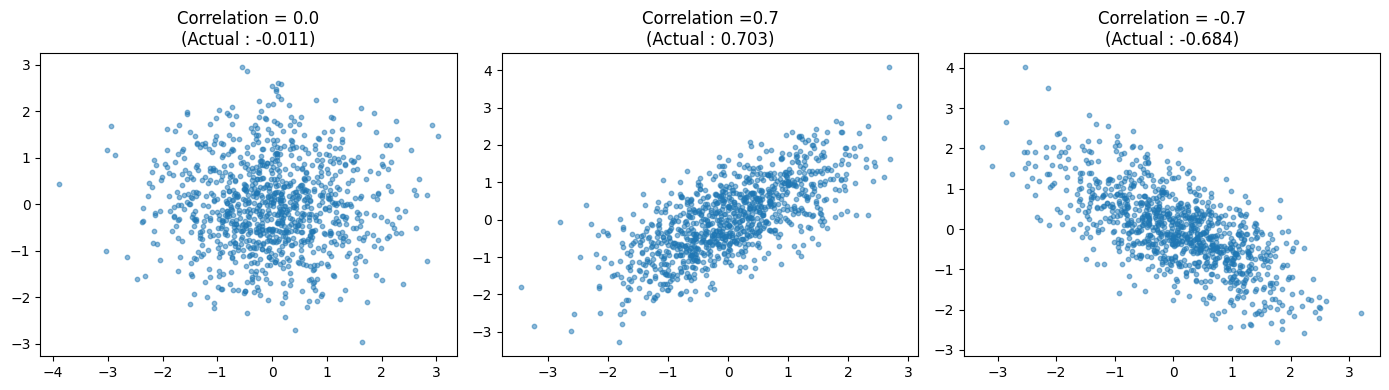

In [21]:
#Visualizing it

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

#No Correlation
x1,y1 = generate_correlated_features(1000, correlation=0.0)
axes[0].scatter(x1, y1, alpha=0.5, s=10)
axes[0].set_title(f'Correlation = 0.0\n(Actual : {np.corrcoef(x1, y1)[0, 1]:.3f})')

#Postive Correlation
x2, y2 = generate_correlated_features(1000, correlation=0.7)
axes[1].scatter(x2, y2, alpha=0.5, s=10)
axes[1].set_title(f'Correlation =0.7\n(Actual : {np.corrcoef(x2, y2)[0, 1]:.3f})')

#Negative Correlation:
x3, y3 = generate_correlated_features(1000, correlation=-0.7)
axes[2].scatter(x3, y3, alpha=0.5, s=10)
axes[2].set_title(f'Correlation = -0.7\n(Actual : {np.corrcoef(x3, y3)[0, 1]:.3f})')

plt.tight_layout()
plt.show()

Creating a Target Variable

In [24]:
def generate_target(features_df, weights, noise=0.1, target_type='binary', seed=42):
    """
    Generate a target variable with known relationship to features.

    Parameters:
    -----------
    features_df : DataFrame with feature columns
    weights : dict mapping feature names to their influence on target
    noise : how much randomness to add
    target_type : 'binary' or 'continuous'
    """
    rng = np.random.default_rng(seed)
    n_samples = len(features_df)

    #compute linear combination
    linear_combination = np.zeros(n_samples)
    for feature, weight in weights.items():
      if feature in features_df.columns:
        linear_combination += weight * features_df[feature].values

    #Add noise
    noise_amount = noise * np.std(linear_combination)
    linear_combination += rng.normal(0, noise_amount, n_samples)

    #Convert to target type
    if target_type == 'binary':
      probabilities = 1 / (1 + np.exp(-linear_combination))
      target = rng.binomial(1, probabilities)

    else:
      target = linear_combination

    return target

#Example usage
rng = np.random.default_rng(42)
n = 1000

#create features
df = pd.DataFrame({
    'tenure': rng.exponential(3, n),
    'monthly_charges': rng.normal(70, 20, n),
    'support_calls': rng.poisson(2, n)
})

# Define the true relationships
true_weights = {
    'tenure': -0.3, # Longer tenure → LESS likely to churn
    'monthly_charges': 0.02, # Higher charges → MORE likely to churn
    'support_calls': 0.5  # More support calls → MORE likely to churn
}

# Generate the target variable
df['churned'] = generate_target(df, true_weights, noise=0.3, target_type='binary')

print('Sample data:')
print(df.head(10))
print(f'\nChurn rate: {df['churned'].mean():.1%}')

Sample data:
     tenure  monthly_charges  support_calls  churned
0  7.212626        55.414261              2        0
1  7.008569        61.710539              2        0
2  7.154283        82.678208              2        1
3  0.839383        70.059866              3        1
4  0.259312        76.804200              0        1
5  4.357982        83.401585              2        1
6  4.229882        62.503171              0        0
7  9.372888        85.124963              4        1
8  0.237883        77.576852              3        1
9  3.139683        45.303738              4        1

Churn rate: 75.0%


Adding Missing Values

In [32]:
def add_missing_values(series, mechanism='MCAR', proportion=0.1, depends_on=None, seed=42):
  """
    Add missing values with different mechanisms.

    MCAR: Missing Completely At Random
          - Missingness is random, unrelated to any data

    MAR:  Missing At Random
          - Missingness depends on OTHER observed variables
          - Example: Young people don't report income

    MNAR: Missing Not At Random
          - Missingness depends on the MISSING VALUE ITSELF
          - Example: High earners don't report income
    """
  rng = np.random.default_rng(seed)
  result = series.copy()
  n = len(series)

  if mechanism == 'MCAR':
    mask = rng.random(n) < proportion

  elif mechanism == "MAR":
    if depends_on is None:
      raise ValueError("MAR needs 'Depends_on series")

    threshold = np.percentile(depends_on, 50)
    mask = np.zeros(n, dtype=bool)
    high_group = depends_on > threshold

    # Ensure sizes are non-negative integers before passing to rng.random()
    size_high = int(high_group.sum())
    if size_high < 0: size_high = 0
    mask[high_group] = rng.random(size_high) < proportion * 1.5

    size_not_high = int((~high_group).sum())
    if size_not_high < 0: size_not_high = 0
    mask[~high_group] = rng.random(size_not_high) < proportion

  elif mechanism == "MNAR":
    threshold = np.percentile(series, 70)
    mask = np.zeros(n, dtype=bool)
    high_group = series > threshold

    # Ensure sizes are non-negative integers before passing to rng.random()
    size_high = int(high_group.sum())
    if size_high < 0: size_high = 0
    mask[high_group] = rng.random(size_high) < proportion * 2

    size_not_high = int((~high_group).sum())
    if size_not_high < 0: size_not_high = 0
    mask[~high_group] = rng.random(size_not_high) < proportion * 0.3

  result[mask] = np.nan
  return result

df['income'] = rng.lognormal(10.5, 0.5, n)
df['income_with_missing'] = add_missing_values(df['income'], mechanism="MNAR", proportion=0.15)

print(f'Original Missing: {df['income'].isna().sum()}')
print(f'New Missing: {df['income_with_missing'].isna().sum()}')

Original Missing: 0
New Missing: 130


Visualizing the impact

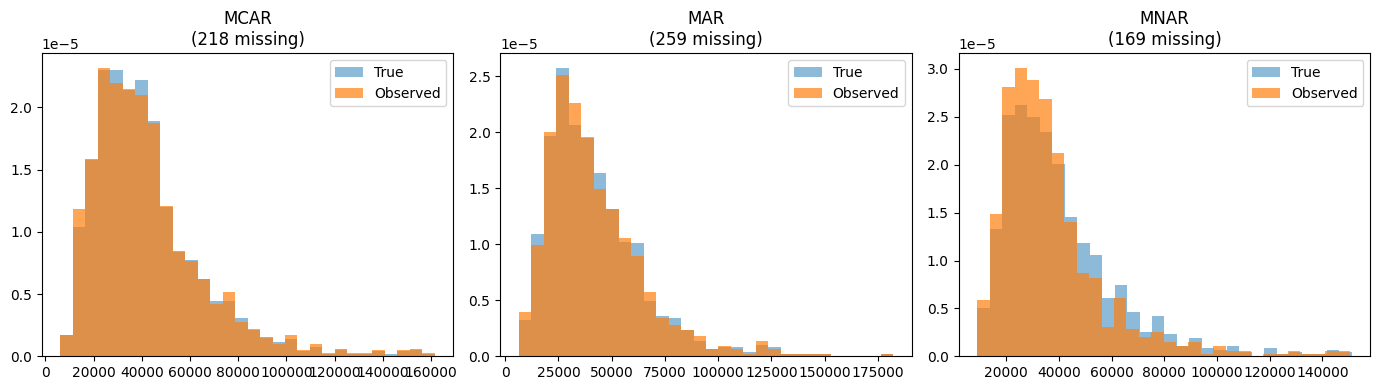

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, mech in zip(axes, ['MCAR', 'MAR', 'MNAR']):
    original = rng.lognormal(10.5, 0.5, 1000)
    age = rng.normal(35, 10, 1000)  # For MAR

    if mech == 'MAR':
        with_missing = add_missing_values(pd.Series(original), mech, 0.2, depends_on=pd.Series(age))
    else:
        with_missing = add_missing_values(pd.Series(original), mech, 0.2)

    ax.hist(original, bins=30, alpha=0.5, label='True', density=True)
    ax.hist(with_missing.dropna(), bins=30, alpha=0.7, label='Observed', density=True)
    ax.set_title(f'{mech}\n({with_missing.isna().sum()} missing)')
    ax.legend()

plt.tight_layout()
plt.show()

Adding Outliers

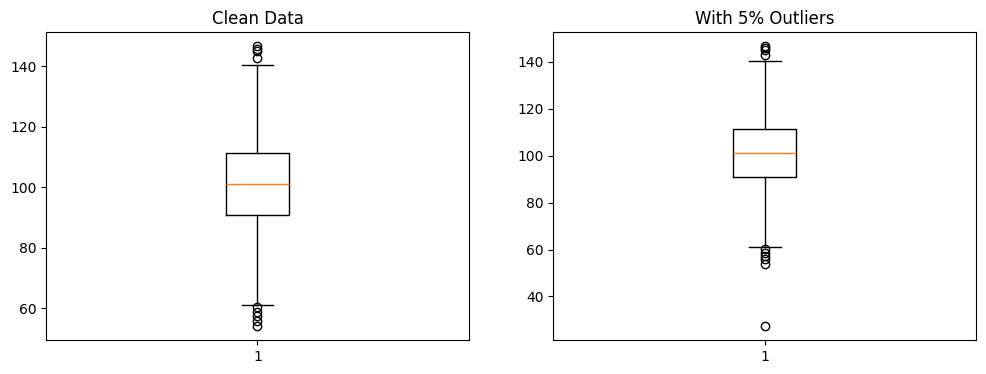

In [34]:
def add_outliers(series, contamination=0.05, factor=4, seed=42):
   """
    Add outliers to a numeric series.

    Parameters:
    -----------
    contamination : proportion of values to make outliers
    factor : how many standard deviations away
    """
   rng = np.random.default_rng(seed)
   result = series.copy()
   n = len(series)

   #Select random indices to become outliers
   n_outliers = int(n * contamination)
   outlier_indices = rng.choice(n, size=n_outliers, replace=False)

   mean = series.mean()
   std = series.std()

   for idx in outlier_indices:
    direction = rng.choice([-1, 1])
    magnitude = factor * std * (1 + rng.random())
    result.iloc[idx] = mean + direction * magnitude

    return result

#example
clean_data = pd.Series(rng.normal(100, 15, 1000))
dirty_data = add_outliers(clean_data, contamination=0.05, factor=4)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].boxplot(clean_data)
axes[0].set_title("Clean Data")
axes[1].boxplot(dirty_data)
axes[1].set_title("With 5% Outliers")
plt.show()


Putting it all together - The complete class